<a href="https://colab.research.google.com/github/jirvingphd/fsds_100719_cohort_notes/blob/master/sect_12_APIs_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APIs (Application Programming Interfaces)

## Learing Objectives:
- Describe what an API is and provide examples.
- Practice Accessing an API as a group.
- Split into breakout rooms for a pair-programming API activity.




## REFERENCES
- Postman Software as demo'd by Rafael at the End of Class
    - www.getpostman.com
- [Shared Google Drive foler containing this notebook and the student activity.](https://drive.google.com/open?id=1AnCg6j87sU8C-93eB2ba-rZ7qZ9-kJz9)

## Think Communication

Application to another application:
* Send request (with some info/data)
* Get response
    + data
    + service


Examples include:

- Financial transactions
- Posting to Twitter
- Controlling IOT

Always a software-to-software interaction

Typical way of getting data (usually JSON or XML)

## Parts of an API



* **Access Permissions**
    + User allowed to ask?
    
* **API Call/Request**
    + Code used to make API call to implement complicated tasks/features
    + _Methods_: what questions can we ask?
    + _Parameters_: more info to be sent
    
* **Repsonse**
    + Result of request

<!-- <img src='https://raw.githubusercontent.com/matthewsparr/Data-Science-Lessons/master/Mod%202/APIs/raven.jpg' width=500> -->



<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-apis-online-ds-ft-100719/master/images/new_api4.png" width=600>

## API Types


### Web


Interface can work at both server or client end

Examples:
* [Twitter REST API](https://developer.twitter.com/en/docs.html)
* [Amazon S3 REST API](https://docs.aws.amazon.com/AmazonS3/latest/API/Welcome.html)

### Databases

* Pass back data in specific format
* Generalizable

### Operating Systems

* Including the services requested from the OS

## Client - Server Model

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-introduction-to-apis-online-ds-ft-100719/master/images/new_client-server-illustration.png" width=400>

Distributed architecture:
1. Servers: provide a service
    - Usually physically separate from clinet
2. Clients: request a service
    - hardware or software

### Client

**Web Example**

Defines what user sees, so it must:
  + Define the page visuals
  + Methods for responding to user interactions

### Server

**Web Example**

Listens to requests (through HTTP):
1. Authenticates client/user
2. Looks at requests
3. Performs actions/processes needed
4. Sends response to client (possibly with more data)

### Databases

Can be called from the server to get data for the client

# HTTP Requests

Specific formatting to make a proper request.

Libraries `urllib` & `urllib2` can be complicated 😕

## Code Example

We can use `requests` library to get web page form data, files, and parameters more easily.

In [0]:
import requests

In [0]:
# Getting the response from our request 
resp = requests.get('https://www.google.com')

In [0]:
type(resp)

requests.models.Response

In [0]:
requests.codes.ok

200

In [0]:
print('Response Code:',resp.status_code)
print('Is it OK?',resp.status_code == requests.codes.ok)

Response Code: 200
Is it OK? True


### Parts of the response

In [0]:
# Full HTML doc
from pprint import pprint
# print(resp.text[:1000])

pprint(resp.text[:1000])

('<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" '
 'lang="en"><head><meta content="Search the world\'s information, including '
 'webpages, images, videos and more. Google has many special features to help '
 'you find exactly what you\'re looking for." name="description"><meta '
 'content="noodp" name="robots"><meta content="text/html; charset=UTF-8" '
 'http-equiv="Content-Type"><meta '
 'content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" '
 'itemprop="image"><title>Google</title><script '
 'nonce="eQllLnNt1zKFlLofhj7Pbg==">(function(){window.google={kEI:\'Nq7BXduiMcf4wAKg64igAg\',kEXPI:\'0,1353747,5662,731,223,510,1065,3152,378,206,1017,54,2133,10,713,338,96,110,8,43,5,277,926,268,172,69,4,1130488,143,1197784,365,19,329099,1294,12383,4855,32692,15247,861,17450,1100,3335,2,2,6801,364,3319,5505,224,2218,5942,1119,2,578,728,2431,1362,4323,3700,1267,774,2252,1405,1413,3070,9,1963,6196,1719,1808,1977,2043,5766,1,3142,5297,2016,38,920,873,1215,

In [0]:
pprint(resp.headers)
# Convert to a dicitonary from `requests.structures.CaseInsensitiveDict`
headers = dict(resp.headers)

{'Date': 'Tue, 05 Nov 2019 17:15:34 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '1P_JAR=2019-11-05-17; expires=Thu, 05-Dec-2019 17:15:34 GMT; path=/; domain=.google.com; SameSite=none, NID=190=Ua-DtcriEneGu6FdMGvevh3Ce6POTpJVN-YyZGXyhJ57WCdWL3KLwnsbhfXostgvG3viaO21MzjJ1p8hHEEEC-k-i7ecTzCXgIHuZC6Klcpypw4ArGSl7sBLNYpeJL_cto2Mt4O0NFWU9XAorz9sQ60eGVMCfvldn0RRPS2iB2c; expires=Wed, 06-May-2020 17:15:34 GMT; path=/; domain=.google.com; HttpOnly', 'Transfer-Encoding': 'chunked'}


In [0]:
print(headers['Date'])   # Date the response was sent
print(headers['Server']) # Server type (google web service - GWS)

Tue, 05 Nov 2019 17:15:34 GMT
gws


### Passing Parameters

In [0]:
credentials = {'user_name': 'luigi', 'password': 'i<3peach'}  
r = requests.get('http://httpbin.org/get', params=credentials)

# Note we can only do this since the r.text() is JSON format
results = r.json()
# Don't want my IP floating around 😉
results['origin'] = None

print(r.url)  
display(results)

http://httpbin.org/get?user_name=luigi&password=i%3C3peach


{'args': {'password': 'i<3peach', 'user_name': 'luigi'},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.21.0'},
 'origin': None,
 'url': 'https://httpbin.org/get?user_name=luigi&password=i<3peach'}

### HTTP Post

Allows multiples be sent at once 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{
  "args": {}, 
  "data": "", 
  "files": {
    "image": ""
  }, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "491845", 
    "Content-Type": "multipart/form-data; boundary=6800d93d90be78aefffe78ce5d796b0b", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.21.0"
  }, 
  "json": null, 
  "origin": "35.204.12.19, 35.204.12.19", 
  "url": "https://httpbin.org/post"
}


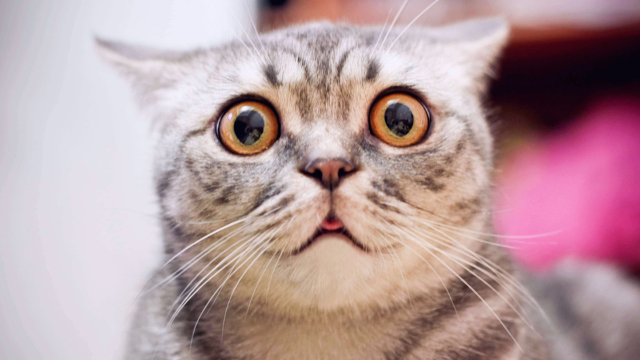

In [0]:
# Example won't run without example files
filepath_cat = '/content/drive/My Drive/Colab Notebooks/Study Groups/Mod 2/section_12/sect_12_students/cat.png'
filepath_dog = '/content/drive/My Drive/Colab Notebooks/Study Groups/Mod 2/section_12/sect_12_students/dog.jpg'

url = 'http://httpbin.org/post'  
file_list = [  
    # ('image', ('cat.png', open('cat.png', 'rb'), 'image/png')),
    # ('image', ('dog.jpg', open('dog.jpg', 'rb'), 'image/jpg'))

    ('image', ('cat.png', open(filepath_cat, 'rb'), 'image/png')),
    ('image', ('dog.jpg', open(filepath_dog, 'rb'), 'image/jpg'))
]

r = requests.post(url, files=file_list)  
print(r.text)

# OAuth (Open Authorization)

Avoid abuse by limiting.

Usually we can use personal access tokens (typical for development).
But with large number of authentication, OAuth is most common

1. Get credentials & authorize application (before OAuth)
2. **Authorize** permissions requested
3. **Redirect** use back w/ authorization code
4. **Aquisition** user "recieves" access token

Check out curriculum for full details

## Why use OAuth?

Alternative is essentially a username & password (API key & secret)

Allows access without user password:
**Authentication** separated from **Authorization**

# Example Using An API

## LIFX API

Documentation: https://api.developer.lifx.com/

In [0]:
import requests
import json
import pandas as pd

In [0]:
tokens = {
        'lifx' : {
            'token_name': 'Lifx',
            'token': 'c33cf42e79aaf8afc8b647e13b07ff9fe668587c41c722ae6896462f835190ab',
        }
}

In [0]:
# Specific to today
token = tokens['lifx']['token']

headers = {
    "Authorization": "Bearer %s" % token,
}

response = requests.get('https://api.lifx.com/v1/lights/all', headers=headers)

In [0]:
lights = response.json()
display(lights)

[{'brightness': 1,
  'color': {'hue': 0, 'kelvin': 3500, 'saturation': 0},
  'connected': True,
  'effect': 'OFF',
  'group': {'id': '3d5a822c35807538baf71c686df1f22e', 'name': 'Room 2'},
  'id': 'd073d533cbad',
  'label': "Mom's Room",
  'last_seen': '2019-11-05T17:24:16Z',
  'location': {'id': '00fbb492ce852678eda5704d3470229d', 'name': 'My Home'},
  'power': 'on',
  'product': {'capabilities': {'has_chain': False,
    'has_color': False,
    'has_ir': False,
    'has_matrix': False,
    'has_multizone': False,
    'has_variable_color_temp': True,
    'max_kelvin': 4000,
    'min_kelvin': 1500},
   'company': 'LIFX',
   'identifier': 'lifx_mini_day_and_dusk',
   'name': 'LIFX Mini Day and Dusk'},
  'seconds_since_seen': 0,
  'uuid': '02e3bd5b-ecb8-4bb0-b6e5-b648392f16ec'},
 {'brightness': 1,
  'color': {'hue': 0, 'kelvin': 3500, 'saturation': 0.003997863736934462},
  'connected': False,
  'effect': 'OFF',
  'group': {'id': 'c390740109f7aae4526905966a30a803', 'name': 'Room 1'},
  'id'

In [0]:
pd.DataFrame.from_dict(lights)

id  ... seconds_since_seen
0  d073d533cbad  ...                  0
1  d073d5348133  ...           14146087

[2 rows x 13 columns]

In [0]:
for light in lights:
    print(light['label'])

Mom's Room
Matt's Room


### Power On

In [0]:
payload = {
  "states": [
    {
        "selector" : str(lights[1]['id']),
        "power": "on"
    }
  ]
}
response = requests.put('https://api.lifx.com/v1/lights/states', data=json.dumps(payload), headers=headers)
pprint(response.content)

(b'{\n  "results": [\n    {\n      "operation": {\n        "selector": "id:d073'
 b'd5348133",\n        "power": "on"\n      },\n      "results": [\n       '
 b' {\n          "id": "d073d5348133",\n          "status": "offline",\n      '
 b'    "label": "Matt\'s Room"\n        }\n      ]\n    }\n  ]\n}')


### Power On w/ Color

In [0]:
# payload = {
#   "states": [
#     {
#         "selector" : str(lights[1]['id']),
#             "period": 2,
#             "cycles": 5,
#             "color": "blue",
#             "brightness": 0.5
#     }
#   ],
#   "defaults": {
#     "power": "on",
#     "saturation": 0,
#     "duration": 2.0

# }

# }

# response = requests.put('https://api.lifx.com/v1/lights/states', data=json.dumps(payload), headers=headers)
# print(response.content)

b'{\n  "results": [\n    {\n      "operation": {\n        "selector": "id:d073d5348133",\n        "color": "blue",\n        "brightness": 0.5\n      },\n      "results": [\n        {\n          "id": "d073d5348133",\n          "status": "offline",\n          "label": "Matt\'s Room"\n        }\n      ]\n    }\n  ]\n}'


### Power Off

In [0]:
payload = {
  "states": [
    {
        "selector" : str(lights[1]['id']),
        "power": "off"
    }
  ]
}

response = requests.put('https://api.lifx.com/v1/lights/states', data=json.dumps(payload), headers=headers)
print(response.content)